<a href="https://colab.research.google.com/github/Rachit23110261/Unsupervised-Learning-Graph-Mining-and-Probabilistic-Data-Structures/blob/main/DataScience_Homework_23110261_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 1**

Name: Rachit Mehta (23110261)

Collaborators:

Kaushal Bule (23110160)

Akash KP (23110021)

Rajput Vivek (23110269)

Prateek Takshak (23110256)




Quesstion 1

We have to minimize following objective:

$$
\text{cost}(C) = \sum_{i=1}^{k} \frac{1}{|C_i|} \sum_{x, y \in C_i} \|x - y\|^2
$$

Where:
- $(C = \{C_1, C_2, \dots, C_k\})$ is a list containig $Ci$ as ith cluster.
- $( |C_i|)$ represents the number of data points in cluster $ C_i$.
- $( \|x - y\|^2 )$ is the square of Euclidean distance between points $ x $ and $y$ which belong to the cluster $Ci$

Our aim is to minimize this cost function by optimally making K clusters from the dataset.

$\text{cost}(C) = \sum_{i=1}^{k} \frac{1}{|C_i|} \sum_{x, y \in C_i} \|x - y\|^2$

We will show that this objective function is equal to **twice** the k-means objective:

$\sum_{i=1}^{k} \sum_{x \in C_i} \|x - c_i\|^2$

where $c_i$ is the centroid of cluster $C_i$.  

Using the squared Euclidean distance identity:

$\|x - y\|^2 = \|x\|^2 + \|y\|^2 - 2 \langle x, y \rangle$

Summing over all pairs $(x, y)$ within each cluster:

$\sum_{x, y \in C_i} \|x - y\|^2 = \sum_{x, y \in C_i} (\|x\|^2 + \|y\|^2 - 2 \langle x, y \rangle).$

Since summation is symmetric:

$\sum_{x, y \in C_i} \|x - y\|^2 = 2 |C_i| \sum_{x \in C_i} \|x\|^2 - 2 \sum_{x, y \in C_i} \langle x, y \rangle.$

$\sum_{x, y \in C_i} \|x - y\|^2 = 2 |C_i| \sum_{x \in C_i} \|x\|^2 - 2 \sum_{x \in C_i} \sum_{y \in C_i} \langle x, y \rangle.$

$\sum_{x, y \in C_i} \|x - y\|^2 = 2 |C_i| \sum_{x \in C_i} \|x\|^2 - 2 \sum_{x \in C_i}  \langle x, \sum_{y \in C_i} y \rangle.$

$\sum_{x, y \in C_i} \|x - y\|^2 = 2 |C_i| \sum_{x \in C_i} \|x\|^2 - 2 \sum_{x \in C_i}  \langle x, |C_i| c_i \rangle.$

$\sum_{x, y \in C_i} \|x - y\|^2 = 2 |C_i| \sum_{x \in C_i} \|x\|^2 - 2 |C_i|  \langle \sum_{x \in C_i}x,  c_i \rangle.$

$\sum_{x, y \in C_i} \|x - y\|^2 = 2 |C_i| \sum_{x \in C_i} \|x\|^2 - 2 |C_i|^2 \|c_i\|^2$



Let's call this identity 1 and we will use it later.

The centroid is:

$c_i = \frac{1}{|C_i|} \sum_{x \in C_i} x.$

The k-means objective is:

$\sum_{x \in C_i} \|x - c_i\|^2 = \sum_{x \in C_i} \|x\|^2 - 2 \sum_{x \in C_i} \langle x, c_i \rangle + |C_i| \|c_i\|^2.$

Since:

$\sum_{x \in C_i} \langle x, c_i \rangle = |C_i| \langle c_i, c_i \rangle = |C_i| \|c_i\|^2$

we get:

$\sum_{x \in C_i} \|x - c_i\|^2 = \sum_{x \in C_i} \|x\|^2 - |C_i| \|c_i\|^2.$

Using the identity 1:

$\sum_{x, y \in C_i} \|x - y\|^2 = 2 |C_i| \sum_{x \in C_i} \|x - c_i\|^2.$

Dividing by $|C_i|$:

$\frac{1}{|C_i|} \sum_{x, y \in C_i} \|x - y\|^2 = 2 \sum_{x \in C_i} \|x - c_i\|^2.$

Summing over all clusters:

$\sum_{i=1}^{k} \frac{1}{|C_i|} \sum_{x, y \in C_i} \|x - y\|^2 = 2 \sum_{i=1}^{k} \sum_{x \in C_i} \|x - c_i\|^2.$

Thus, the given cost function is exactly **twice** the standard k-means objective:

$\sum_{i=1}^{k} \sum_{x \in C_i} \|x - c_i\|^2.$

The factor of **2** appears because the given cost function sums over **all** pairwise distances within each cluster, whereas k-means only considers the squared distance to the centroid.


So, we should use lloyd's algorithm for this.


1. **Initialization**:
   
   Randomly initialize $k$ cluster centroids ($c_1$, $c_2$, $\dots$, $c_k$). These centroids can be chosen randomly from all the data points.

2. **Cluster Assignment**:
   loop over each data point $x$, put it in the the closest centroid $c_i $

   $$
   C_i = \{x \mid \|x - c_i\|^2 \leq \|x - c_j\|^2, \forall j \neq i \}
   $$

   This divides the data points into K clusters based on the centroids defined.

3. **Update centroid after each step**:
   Update the centroids to the mean of the points within each cluster:
   $$
   c_i = \frac{1}{|C_i|} \sum_{x \in C_i} x
   $$
   The reason for updating the centroids to the mean of the points within each cluster is that it minimizes the sum of squared distances between points and their cluster center. Formally, given a cluster $C_i$, the objective is to minimize the within-cluster sum of squared distances (WCSS):

  $$
  \sum_{x \in C_i} \|x - c_i\|^2
  $$

  Taking the derivative with respect to \( c_i \) and setting it to zero:

  $$
  \frac{d}{d c_i} \sum_{x \in C_i} \|x - c_i\|^2 = \sum_{x \in C_i} 2 (c_i - x) = 0
  $$

  Solving for $c_i$:

  $$
  c_i = \frac{1}{|C_i|} \sum_{x \in C_i} x
  $$

  This shows that the mean minimizes the sum of squared distances, justifying the update rule.


4. **Repeat**:
   Decide number of max iterations or a threshold for cost
   Repeat the **Assignment** and **Update** steps until max iterations or threshold is reached.



###Question 2

**To PROVE :**

The optimal value for the k-means problem when cluster centers are required to be data points is at most four times the optimal value when arbitrary points are allowed as centers.

**PROOF :**

Let $ \text{OPT}_{\text{arbitrary}} $ be the optimal k-means cost when centers can be any points irrespective of the centers. Let $ C = \{c_1, c_2, \ldots, c_k\} $ be the optimal centers, and let $ S_1, S_2, \ldots, S_k $ be the corresponding clusters.  

Now,Let $ \text{OPT}_{\text{centers}} $ be the optimal k-means cost when centers can be only centers. So, Instead of using arbitrary centers, we choose new centers from the given data points. For each cluster $ S_i $, pick a data point $ x_i $ that is closest to $ c_i $. That is:  

$
x_i = \arg \min_{x \in S_i} \|x - c_i\|
$

This ensures that the new center $ x_i $ is the closest available data point to the optimal center $ c_i $, which helps in bounding the new k-means cost.  

For any data point $ x $ originally assigned to cluster $ S_i $, we use the triangle inequality:  

$
\|x - x_i\| \leq \|x - c_i\| + \|c_i - x_i\|
$

Squaring both sides and applying the inequality $ (a + b)^2 \leq 2a^2 + 2b^2 $, we get:  

$
\|x - x_i\|^2 \leq 2\|x - c_i\|^2 + 2\|c_i - x_i\|^2
$

Summing this over all points in all clusters, the total cost with the new centers $ x_i $ is:  

$
\sum_{i=1}^k \sum_{x \in S_i} \|x - x_i\|^2 \leq \sum_{i=1}^k \sum_{x \in S_i} \left( 2\|x - c_i\|^2 + 2\|c_i - x_i\|^2 \right)
$

This can be rewritten as:  

$
\sum_{i=1}^k \sum_{x \in S_i} \|x - x_i\|^2 \leq 2 \sum_{i=1}^k \sum_{x \in S_i} \|x - c_i\|^2 + 2 \sum_{i=1}^k \sum_{x \in S_i} \|c_i - x_i\|^2
$

### Bounding the Two Terms:

1. **First Sum:**  
   By definition, the first sum is exactly twice the optimal cost with arbitrary centers:  

   $
   2 \sum_{i=1}^k \sum_{x \in S_i} \|x - c_i\|^2 = 2 \text{OPT}_{\text{arbitrary}}
   $

2. **Second Sum:**  
   Since $ x_i $ is chosen as the closest data point to $ c_i $, we have:  

   $
   \|c_i - x_i\|^2 \leq \|c_i - x\|^2, \quad \forall x \in S_i
   $

   Summing over all points in $ S_i $:  

   $
   \sum_{x \in S_i} \|c_i - x_i\|^2 \leq \sum_{x \in S_i} \|c_i - x\|^2
   $

   Summing over all clusters:  

   $
   \sum_{i=1}^k \sum_{x \in S_i} \|c_i - x_i\|^2 \leq \sum_{i=1}^k \sum_{x \in S_i} \|x - c_i\|^2 = \text{OPT}_{\text{arbitrary}}
   $

   So, multiplying by 2:  

   $
   2 \sum_{i=1}^k \sum_{x \in S_i} \|c_i - x_i\|^2 \leq 2 \text{OPT}_{\text{arbitrary}}
   $



### Final Bound:

Adding both terms together:  

$
2 \text{OPT}_{\text{arbitrary}} + 2 \text{OPT}_{\text{arbitrary}} = 4 \text{OPT}_{\text{arbitrary}}
$

Since the optimal cost when centers are restricted to data points, $ \text{OPT}_{\text{data}} $, must be at most this bound, we conclude:  

$
\text{OPT}_{\text{data}} \leq 4 \text{OPT}_{\text{arbitrary}}
$

Thus, the worst-case cost of restricting centers to data points is at most four times the cost of allowing arbitrary centers.


##**Question 3**

To construct a random variable $ X $ for which Markov’s inequality is tight and justify why we use other inequalities like Chebyshev and Chernoff.  

### **Markov’s Inequality:**  
For any non-negative random variable $ X $ and any $ a > 0 $, Markov’s inequality states that:  

$
P(X \geq a) \leq \frac{E[X]}{a}
$

Also, Markov’s inequality is not useful when  $a \geq {E[X]}$.

We want a random variable $X$ for which this bound is tight, which should occur when the inequality holds as an equality.  

### **Constructing a Tight Example:**  

Consider a random variable $ X $ that takes two values:

- $ X = 0 $ with probability $ 1 - p $
- $ X = \frac{E[X]}{p} $ with probability $ p $  

where $ p \in (0,1] $.  


The expectation of $ X $ is:  

$
E[X] = 0 \cdot (1 - p) + \left(\frac{E[X]}{p}\right) \cdot p = E[X]
$

which is consistent.  


For any $ a > 0 $, we have:  

$
P(X \geq a) =
\begin{cases}
0, & \text{if } a > \frac{E[X]}{p} \\  
p, & \text{if } a \leq \frac{E[X]}{p}  
\end{cases}
$

Applying Markov’s inequality:  

$
P(X \geq a) \leq \frac{E[X]}{a}
$

If we set $ a = \frac{E[X]}{p} $, we get:  

$
P(X \geq a) = p
$

while Markov’s bound gives:  

$
\frac{E[X]}{a} = \frac{E[X]}{\frac{E[X]}{p}} = p
$

Thus, we have equality:  

$
P(X \geq a) = \frac{E[X]}{a}
$

this shows that Markov’s inequality is tight for this choice of $ X $.  

### **Why Do We Use Other Inequalities?**  

Even though Markov’s inequality is simple, it can be very loose in most practical cases because it only relies on the expectations of $ X $. In many scenarios, a **tighter bound** can be obtained using additional information like variance or exponential functions:  

- **Chebyshev’s Inequality:** Uses both the expectation and variance of $ X $, giving a stronger bound:  

  $
  P(|X - E[X]| \geq a) \leq \frac{Var[X]}{a^2}
  $

  This inequality is much more tighter if the variance is low.  

- **Chernoff Bound:**
Unlike Markov’s bound, which only uses expectation, Chernoff bounds use exponential functions, leading to much stronger decay in probability.
Compared to Chebyshev’s bound (which decreases as
$\frac{1}{a^2}$
 ), Chernoff’s bound decreases exponentially fast, making it ideal for applications where rare events should have very low probability.
Best for Independent, Light-Tailed Distributions




In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
testset = torchvision.datasets.MNIST(root="./data", train=False, download=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)
X_test = np.array(testset.data, dtype=np.uint8)  # Convert to NumPy array
y_test = np.array(testset.targets, dtype=np.uint8)
print(f"Number of test samples: {len(testset)}")
print(f"Number of xtest samples: {len(X_test)}")
print(f"Number of ytest samples: {len(y_test)}")


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 14.9MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 513kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.55MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.43MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Number of test samples: 10000
Number of xtest samples: 10000
Number of ytest samples: 10000


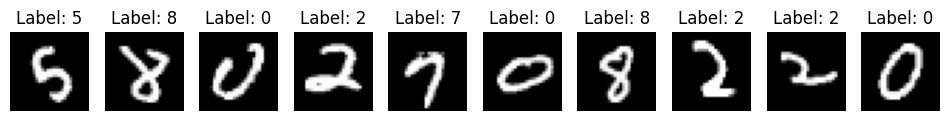

In [ ]:
def kmeans_init(X, y, k):
    n_samples = X.shape[0]
    centers = []
    center_labels = []

    idx = np.random.randint(n_samples)
    centers.append(X[idx])
    center_labels.append(y[idx])

    while len(centers) < k:
        distances = np.array([np.min([np.linalg.norm(x - c)**2 for c in centers]) for x in X])

        probabilities = distances / np.sum(distances)

        new_idx = np.random.choice(n_samples, p=probabilities)
        centers.append(X[new_idx])
        center_labels.append(y[new_idx])

    return np.array(centers), center_labels

centers, center_labels = kmeans_init(X_test, y_test, 10)

fig, axes = plt.subplots(1, 10, figsize=(12, 2))
for i in range(10):
    axes[i].imshow(centers[i], cmap="gray")
    axes[i].set_title(f"Label: {center_labels[i]}")
    axes[i].axis("off")

plt.show()

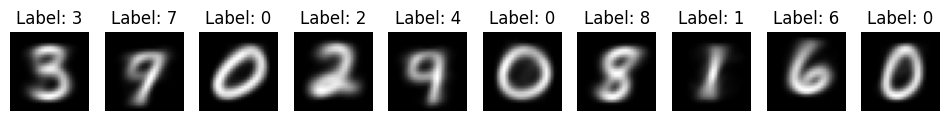

In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from collections import Counter

def Kmeans(centers, center_labels, X, y):
    k = len(centers)
    center_elements = [[] for _ in range(k)]
    center_labels_elements = [[] for _ in range(k)]
    cluster_assignments = np.zeros(len(X), dtype=int)

    while True:
        center_elements = [[] for _ in range(k)]
        center_labels_elements = [[] for _ in range(k)]

        for i, x in enumerate(X):
            distances = np.array([np.linalg.norm(x - c) for c in centers])
            center_index = np.argmin(distances)
            center_elements[center_index].append(x)
            center_labels_elements[center_index].append(y[i])
            cluster_assignments[i] = center_index

        new_centers = [np.mean(cluster, axis=0) if len(cluster) > 0 else centers[i]
                       for i, cluster in enumerate(center_elements)]

        new_center_labels = []
        for labels in center_labels_elements:
            if labels:
                most_common_label = Counter(labels).most_common(1)[0][0]
            else:
                most_common_label = center_labels[len(new_center_labels)]
            new_center_labels.append(most_common_label)

        if np.array_equal(centers, new_centers):
            break

        centers = new_centers
        center_labels = new_center_labels

    return np.array(centers), center_labels, cluster_assignments



final_centers, final_labels,cluster_assignments = Kmeans(centers, center_labels, X_test, y_test)
cluster_assignments=[center_labels[i] for i in cluster_assignments]

fig, axes = plt.subplots(1, 10, figsize=(12, 2))
for i in range(10):
    axes[i].imshow(final_centers[i], cmap="gray")
    axes[i].set_title(f"Label: {final_labels[i]}")
    axes[i].axis("off")

plt.show()


In [ ]:
from sklearn.metrics import rand_score
rand_index = rand_score(y_test, cluster_assignments)
print(f"Rand Index: {rand_index:.4f}")

Rand Index: 0.7862


In [ ]:
from collections import Counter
from sklearn.manifold import TSNE

def two_approx_k_center(X,y, k):
    n_samples = X.shape[0]
    centers = []
    center_labels = []

    idx = np.random.randint(n_samples)
    centers.append(X[idx])
    center_labels.append(y[idx])

    while len(centers) < k:
        distances = np.array([np.min([np.linalg.norm(x - c) for c in centers]) for x in X])
        idx=np.argmax(distances)
        new_center = X[idx]
        new_label= y[idx]
        centers.append(new_center)
        center_labels.append(new_label)

    return np.array(centers)

def assign_clusters(X,y, centers):
    cluster_assignments = np.zeros(len(X), dtype=int)
    for i, x in enumerate(X):
        distances = np.array([np.linalg.norm(x - c) for c in centers])
        cluster_assignments[i] = center_labels[np.argmin(distances)]
    return cluster_assignments

final_centers = two_approx_k_center(X_test,y_test, k=10)
cluster_assignments = assign_clusters(X_test,y_test, final_centers)



In [ ]:
rand_index = rand_score(y_test, cluster_assignments)
print(f"Rand Index: {rand_index:.4f}")

Rand Index: 0.4074


In [ ]:
import numpy as np

def cluster_distance(cluster1, cluster2, data):
    return np.min([np.linalg.norm(data[i] - data[j]) for i in cluster1 for j in cluster2])

def single_linkage_clustering(data, k):
    n = len(data)
    clusters = [{i} for i in range(n)]

    while len(clusters) > k:
        min_dist = float('inf')
        merge_a, merge_b = -1, -1

        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = cluster_distance(clusters[i], clusters[j], data)
                if dist < min_dist:
                    min_dist = dist
                    merge_a, merge_b = i, j

        clusters[merge_a] |= clusters[merge_b]
        del clusters[merge_b]

    cluster_assignments = [0] * n
    for i, cluster in enumerate(clusters):
        for index in cluster:
            cluster_assignments[index] = i

    return cluster_assignments,clusters

X_test_small = X_test[:100]
num_samples, height, width = X_test_small.shape
X_flattened = X_test_small.reshape(num_samples, height * width)
single_linkage_clusters,clusters = single_linkage_clustering(X_flattened, k=10)
rand_index = rand_score(y_test[:100], single_linkage_clusters)
print(f"Rand Index: {rand_index:.4f}")


Rand Index: 0.2507


In [ ]:
num_samples, height, width = X_test.shape
X_flattened = X_test.reshape(num_samples, height * width)
U, S, Vt = np.linalg.svd(X_flattened, full_matrices=False)
def rank_k_approximation(U, S, Vt, num):
    U = U[:,:num]
    Vt = Vt[:num,:]
    S = S[:num]
    S = np.diag(S)
    my_low_rank = np.dot(np.dot(U,S),Vt)
    return my_low_rank

rank_values = [2, 5, 10]
rand_indices_kmeans = []
rand_indices_kcenter = []
for rank_k in rank_values:
    X_k = rank_k_approximation(U, S,Vt, rank_k)
    centers, center_labels = kmeans_init(X_k, y_test, 10)
    final_centers, final_labels, cluster_assignments = Kmeans(centers, center_labels, X_k, y_test)
    cluster_assignments = [center_labels[i] for i in cluster_assignments]
    rand_indices_kmeans.append(rand_score(y_test, cluster_assignments))

    final_centers = two_approx_k_center(X_k, y_test, k=10)
    cluster_assignments = assign_clusters(X_k, y_test, final_centers)
    rand_indices_kcenter.append(rand_score(y_test, cluster_assignments))

for i, rank_k in enumerate(rank_values):
    print(f"Rank-k = {rank_k}:")
    print(f"  K-Means Rand Index: {rand_indices_kmeans[i]:.4f}")
    print(f"  K-Center Rand Index: {rand_indices_kcenter[i]:.4f}")


Rank-k = 2:
  K-Means Rand Index: 0.7864
  K-Center Rand Index: 0.5988
Rank-k = 5:
  K-Means Rand Index: 0.8039
  K-Center Rand Index: 0.5966
Rank-k = 10:
  K-Means Rand Index: 0.8555
  K-Center Rand Index: 0.7940


***Question 5***  

We have a population of **1 million** people, where **at least 1%** are coffee drinkers. We want to estimate this fraction using **random sampling** and determine error bounds with **99% probability**.  

### **Algorithm for Estimating the Fraction of Coffee Drinkers**  

1. **Defining the Random Sampling**  
   - Let the total population be **$ N = 10^6 $**.  
   - The true fraction of coffee drinkers is **at least $ p = 0.01 $**.  
   - We take a random sample of **$ n $** individuals.  

2. **Sample Random $n$ Individuals:**  
   - Select **$ n $** individuals **uniformly at random** from the population.  
   - Let **$ X_i $** be an indicator random variable where:  

   $$
   X_i =
   \begin{cases}
   1, & \text{if person } i \text{ is a coffee drinker} \\
   0, & \text{otherwise}
   \end{cases}
   $$  

   - Define the **sample proportion** of coffee drinkers:  

   $$
   \hat{p} = \frac{1}{n} \sum_{i=1}^{n} X_i
   $$  

   - The sample proportion $ \hat{p} $ is an **unbiased estimator** of the true fraction $ p $ because its expected value equals $ p $:

    $$
    E[\hat{p}] = E\left[\frac{1}{n} \sum_{i=1}^{n} X_i \right]
    $$

    Since expectation is **linear**, we can rewrite this as:

    $$
    E[\hat{p}] = \frac{1}{n} \sum_{i=1}^{n} E[X_i]
    $$

    Each $ X_i $ is an **indicator random variable** that takes the value 1 with probability $ p $, so:

    $$
    E[X_i] = p
    $$

    Substituting this into the equation:

    $$
    E[\hat{p}] = \frac{1}{n} \sum_{i=1}^{n} p = \frac{n p}{n} = p
    $$

    Therefore, $ \hat{p} $ is an **unbiased estimator** of the true fraction $ p $.
  

3. Therefore getting Error Bounds using Chernoff Bound on  $ \hat{p} $  

   - For any $ \epsilon > 0 $, the probability that $ \hat{p} $ deviates from $ p $ satisfies:  

   $$
   P(|\hat{p} - p| \geq \epsilon p) \leq 2 e^{-\frac{n\epsilon^2 p}{2}}
   $$  

   - This means that the probability of the estimated fraction $ \hat{p} $ differing from the true fraction $ p $ by more than $ \epsilon p $ decreases exponentially as $ n $ increases.
   - In the expression $ \epsilon $ corresponds to the relative error between p and $ \hat{p} $ ( i.e. how much the estimated p over n samples deviate from the actual p)

4. **Choosing $ n $ for 99% Probability:**  
   - We set the probability of error to be at most **$ 1\% $**, (i.e. 99% accuracy)  

   $$
   2 e^{-\frac{n\epsilon^2 p}{2}} \leq 0.01
   $$  

   - Solving for \( n \):  

   $$
   e^{-\frac{n\epsilon^2 p}{2}} \leq 0.005
   $$  

   - Taking the natural logarithm on both sides:  

   $$
   -\frac{n\epsilon^2 p}{2} \leq \ln(0.005)
   $$  

   - Using $ \ln(0.005) \approx -5.3 $, we get:  

   $$
   n \geq \frac{2 \times 5.3}{\epsilon^2 p}
   $$  

   - Since **$ p = 0.01 $**, we substitute:  

   $$
   n \geq \frac{2 \times 5.3}{\epsilon^2 \times 0.01} = \frac{10.6}{\epsilon^2 \times 0.01}
   $$  

   - For **$ \epsilon = 0.1 $** (i.e., 10% relative error), we get:  

   $$
   n \geq \frac{10.6}{(0.1)^2 \times 0.01} = \frac{10.6}{10^{-4}} = 106,000
   $$  

   - For **$ \epsilon = 0.05 $** (i.e., 5% relative error), we get:  

   $$
   n \geq \frac{10.6}{(0.05)^2 \times 0.01} = \frac{10.6}{2.5 \times 10^{-5}} = 424,000
   $$  

### **Final Estimate and Error Bound**  

- Using a sample of **106,000 people**, we can estimate the fraction $ \hat{p} $ with a **10% relative error** with **99% probability**.  
- Using a larger sample of **424,000 people**, we can estimate the fraction with a **5% relative error**.  
- This implies that we don't need to survey of all the 1 million population, sampling **424,000 people** also give a good aprroximate with only 5 percent maximum relative error.